In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics, linear_model, neighbors, model_selection
import sklearn.ensemble
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, KFold, cross_val_predict, train_test_split


sns.set_style()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = 'C:/Users/Winson/Desktop/GA_unit projects/insurance_train.csv'

df = pd.read_csv(df)

df.head()

#The integers (such as Age, Ht and BMI) have all been normalised. Medical_Keyword appear to be Dummy variables. 

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


# Structure of data

In [3]:
#Returning a list of column names
df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [4]:
#data type
df.select_dtypes(include = ['object'])

,Product_Info_2
0,D3
1,A1
2,E1
3,D4
4,D2
5,D2
6,A8
7,D2
8,D3
9,E1


In [5]:
#some missing values mainly on Employment info and Insurance history - can probably remove from data set given that we have other variables that explains similar attributes.  
df.isnull().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

In [3]:
df = df.dropna(axis = 1, how = 'any')
df.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_5      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


In [6]:
#crosstab medical keyword to see what impacts it has on the level of insurance risk - only a subset is provided given there are 48 medical keywords used as Dummy variables. 

pd.crosstab([df.Response], df.Medical_Keyword_1, margins = True)


Medical_Keyword_1,0,1,All
Response,,,
1,5730,477,6207
2,6112,440,6552
3,973,40,1013
4,1393,35,1428
5,5145,287,5432
6,10724,509,11233
7,7720,307,8027
8,19090,399,19489
All,56887,2494,59381


# Correlation matrix

Here im analysing, the correlation of my applicant information to the 'Response' variable (insurance risk). Ive subsetted the data so that only variables which i believe are useful have been considered. 

Key customer attributes (Ht, BMI and Age) have all been normalised/standardised. 

Ive removed some of the variables as they didnt seem to have much correlation with our 'Reponse' variable and some had missing values. The 'Product_Info' which relates to the insurance product the applicant applied for does not seem to have much correlation with our 'Reponse' or the level of insurance risk. This is probably because the product selected shouldnt have much affect on the overall insurance risk (rather it would be the product price which would have correlation to insurance risk - not the specific product) as a result ive removed the product_info as i dont believe this provides any information to us.

Ive left the Medical_Keyword dummy variables out of the correlation matrix so that we can see the table much clearer given the amount of dummy variables in the data set, but I will be including these in the model as i believe the presence/abscence of medical ailments will have a direct effect classifying insurance risk. 

The correlation heat map below uses fewer variables but focussing on ones which i believe can be used ot help categorise our "Repsonse". The variables selected mainly relate to customer attributes (Ht, BMI, Age) which would normally be asked for insurance application. Ive also incldued information such as employment info, insurance info and insurance history as i believe these variables can provide additional information that can help categorise insurance risk for our applicants. 

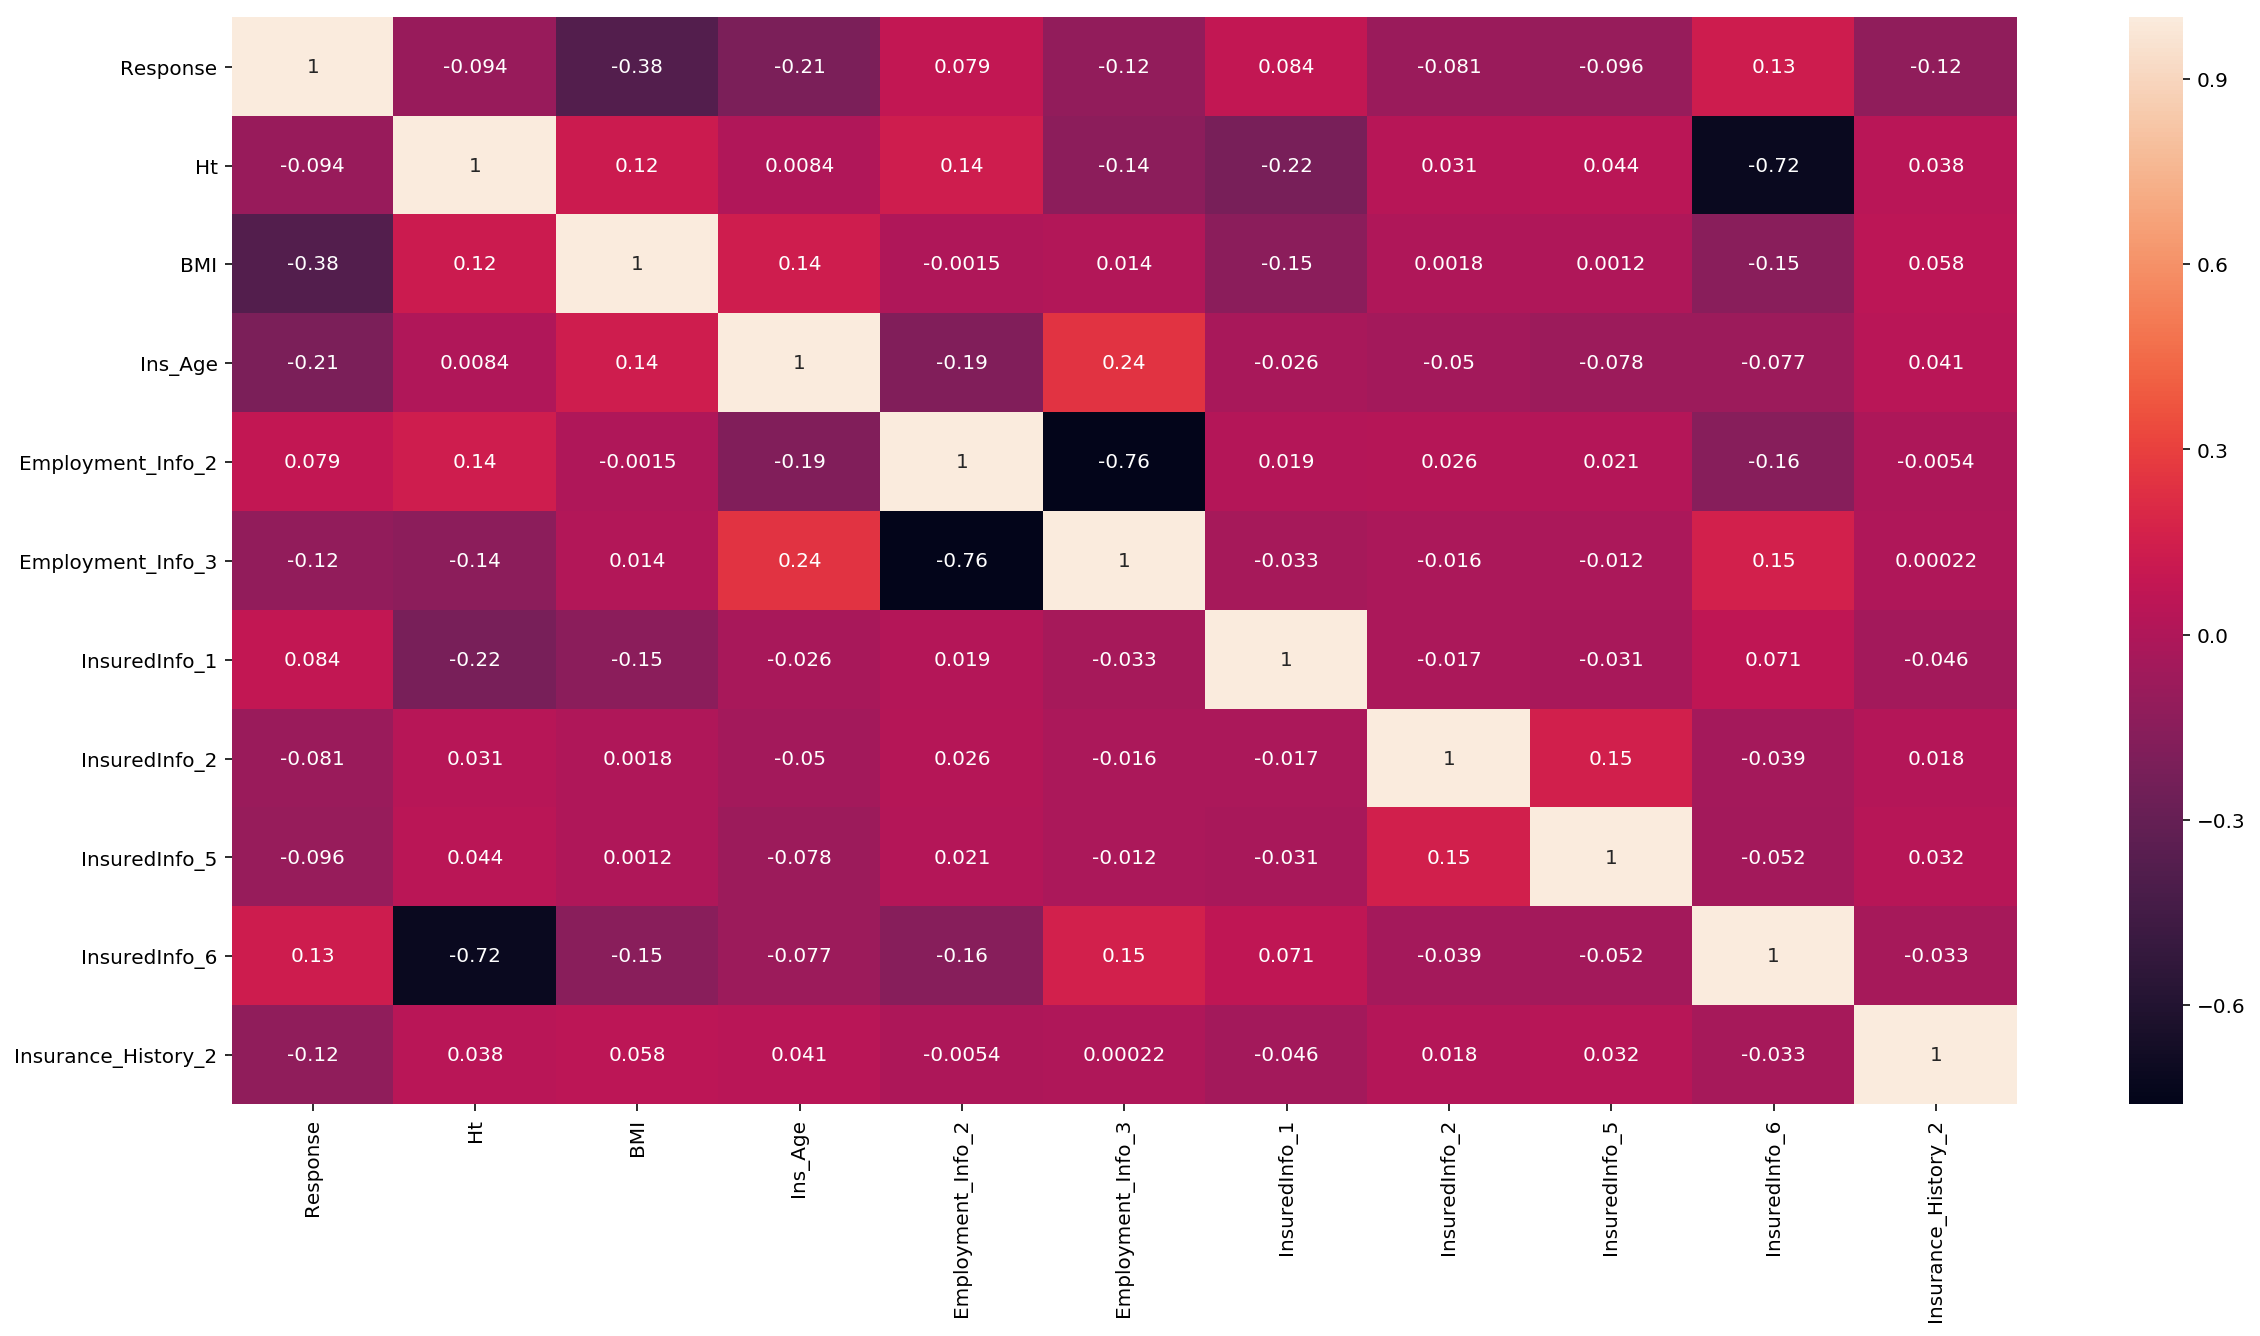

In [7]:
#reduce number of variables for correlation table
ins = df[['Response', 'Ht', 'BMI', 'Ins_Age','Employment_Info_2', 'Employment_Info_3','InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_2']]
plt.figure(figsize=(20,10))
sns.heatmap(ins.corr(), annot=True);

# Expectation of the data

The 'Response' variable has a negative relationship with the key customer attributes (Ht, BMI, Ins-Age). It appears that the higher the "Response" value the lower the level of insurance risk. This means for 'Response = 1' would represent an applicant with the highest level of insurance risk. This suggests that an increase in one of the customer's key attributes such as "BMI" and "Age" increases, the level of risk will also increase i.e insurance premiums would be more expensive - which is something we expect when purchasing incsurance. 

Im expecting the customer attributes to have an impact on insurance risk given that they are an indication to the overall health of an applicant - and is generally basic information you would be expected to provide when purchasing insurance, expecially life insurance.  

I'm also expecting that insurance information and insurance history provided by the applicant will affect the level of insurance risk. This will also be tested with the dummy variables for 'Medical keywords' which indicates whether or not an applicant suffers from a particular ailment.   

# Visualising key customer attributes (Ht, BMI, Age)

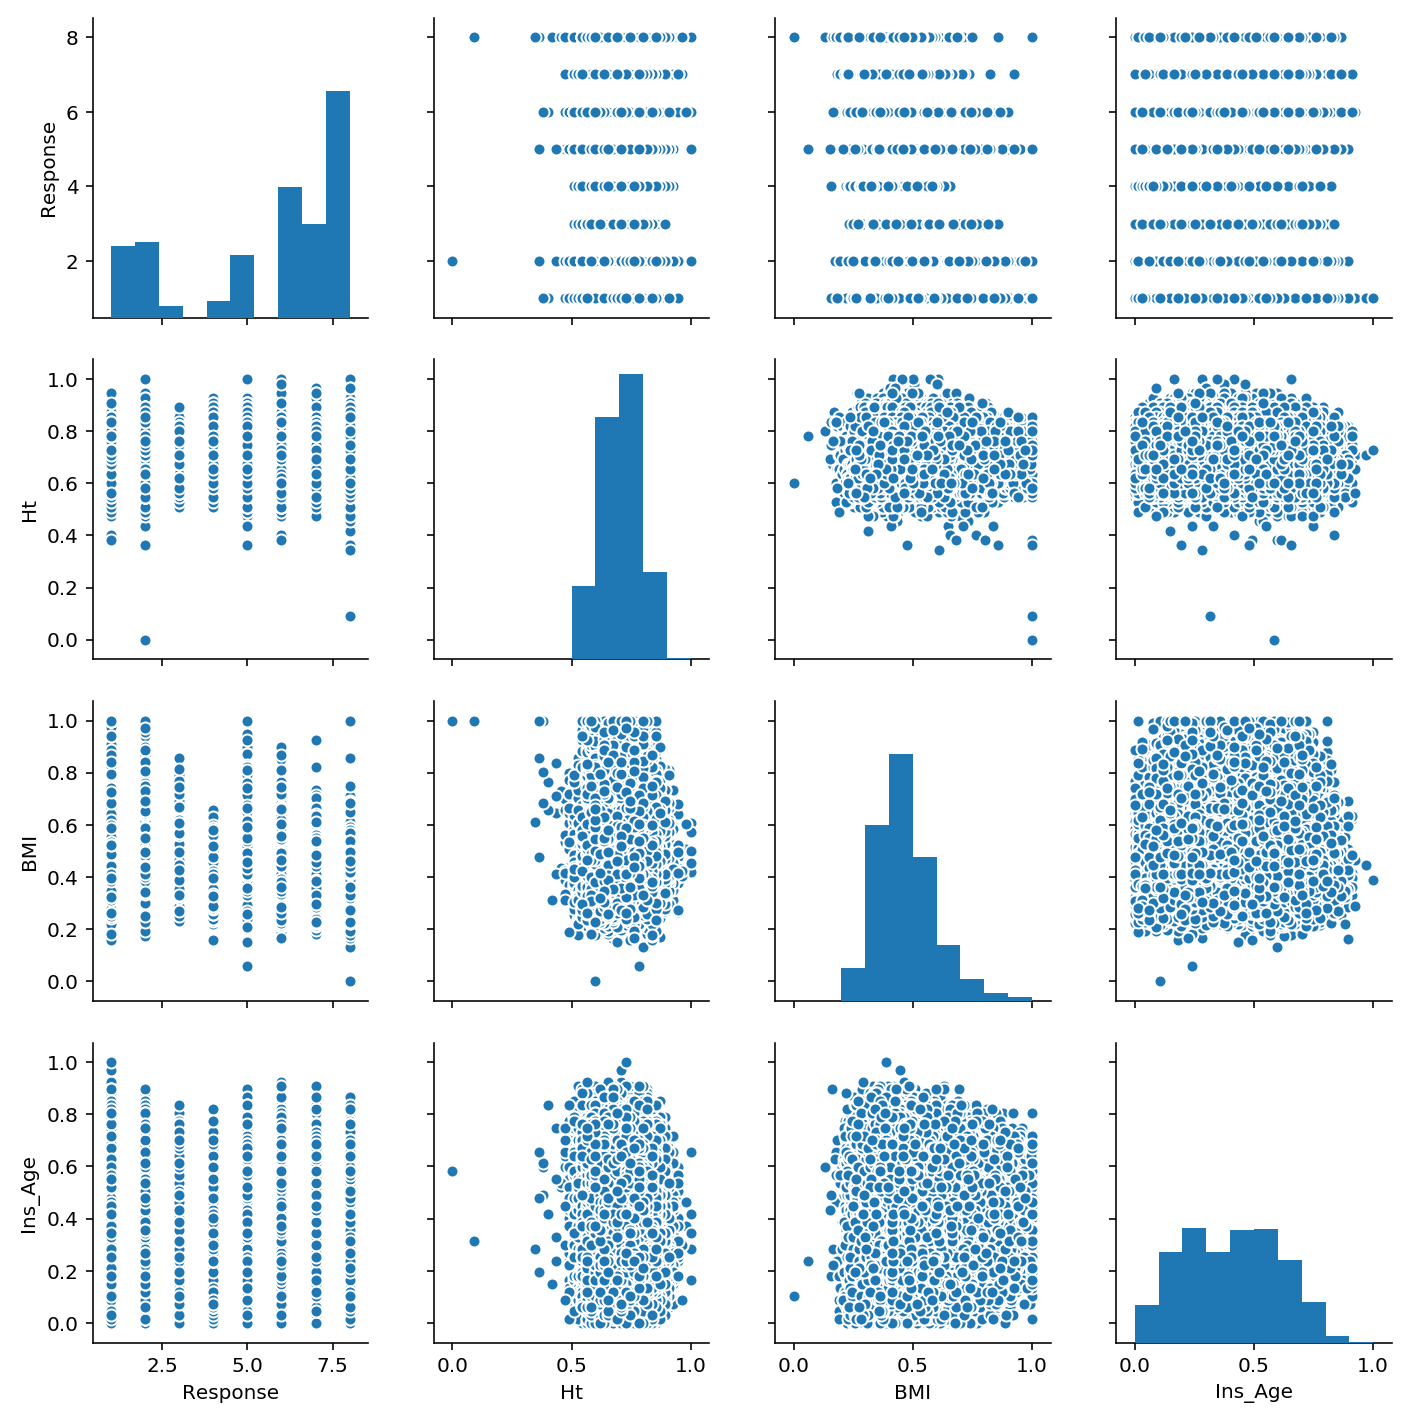

In [8]:
#pair plot of customer attributes with 'Response'

sns.pairplot(ins[['Response', 'Ht', 'BMI', 'Ins_Age']]);

In [8]:
#summary statistics of customer key attributes (Ht, BMI, Age)
key_att = df[['Ht', 'BMI', 'Ins_Age']]
key_att.describe()

,Ht,BMI,Ins_Age
count,59381.000000,59381.000000,59381.000000
mean,0.707283,0.469462,0.405567
std,0.074239,0.122213,0.197190
min,0.000000,0.000000,0.000000
25%,0.654545,0.385517,0.238806
50%,0.709091,0.451349,0.402985
75%,0.763636,0.532858,0.567164
max,1.000000,1.000000,1.000000


The key customer attributes (Ht, BMI and Age) do not apear to be normally distributed. All attributes appear to have some outliers but not a lot that concerns me - which indicates that outliers shouldnt have too much affect on the overall data set. Also there's no discernible pattern in the scatter plots as they seem to all be clustered together. 

# Modelling our Data

# Fit a Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


# Define X and Y variable
y = df['Response']
X = df[['Ht', 'BMI', 'Ins_Age','Employment_Info_2', 'Employment_Info_3','InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_2']]

# Assign variables to capture train test split output with 30% used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate and fit to data
logistic = LogisticRegression()
logistic.fit(X_train,y_train)


# Print (gs.scores())
# print(logistic.score(X_train,y_train))

# Print coefficients for 'Reponse 1 to 8'
print(logistic.coef_)


[[-4.31715664e-01  2.14184857e+00  2.04118155e+00 -4.63253995e-03
   3.59813399e-01  1.25348046e-02  9.37725797e-01  8.57105536e-01
  -4.11087632e-01  5.24870928e-01]
 [-1.85736038e-01  4.68769899e+00  1.40758622e+00 -1.51007310e-03
   9.74760658e-03 -1.24209015e-02  7.83365665e-01  2.47596516e-01
  -2.08163544e-01  3.38237528e-01]
 [-1.63199148e+00  2.54183961e+00 -1.39769841e+00  7.45324201e-03
   3.49470169e-02 -4.35623315e-01  5.02413841e-01  3.27896968e-01
  -3.38520239e-01 -2.68264272e-01]
 [-8.95336480e-01 -4.08687386e+00 -1.38579637e+00  3.34719090e-02
  -2.95984283e-02 -3.44883374e-01 -5.48522739e-01  6.23763957e-02
  -2.31659719e-01 -2.20695568e-01]
 [-1.91135829e-01  6.37196033e+00 -5.42534841e-01 -8.23954873e-04
   1.73789785e-02 -2.51168682e-02 -9.81194666e-01 -1.23906542e-01
   1.00213126e-01 -3.04117167e-01]
 [-1.84249785e-01  1.26014584e+00  5.93616562e-01  1.02308243e-02
  -8.65869542e-02 -1.93584854e-01  6.34152222e-01 -1.42191423e-01
  -6.10556950e-01 -1.31238964e-01

In [5]:
# Test the model to see how well it predicts our test data set

from sklearn import metrics

# Make Prediction using testing data
y_pred = logistic.predict(X_test)

Prediction = pd.DataFrame(y_pred)
Prediction.head()

,0
0,8
1,8
2,8
3,6
4,6


In [14]:
# Compare the predicted values with actual
# Create new Data Frame to store the y actuals and y predicted
preds = pd.DataFrame(y_test)
preds = preds.assign(Prediction=y_pred)
#preds = preds.merge(y_pred)

# Training score
print ('Logistic accuracy score: %.2f' % metrics.accuracy_score(y_test, y_pred))
print ('Logistic Regression RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Logistic accuracy score: 0.41
Logistic Regression RMSE: 2.81


In [10]:
preds.head()

,Response,Prediction
8924,6,8
15366,5,8
44650,2,8
29547,6,6
45007,2,6


# The training model score and RMSE for the logistic regression is not very good - the model has an accuracy of 41% at predicting our 'Reponse' classifier, while our RMSE of 3.38 suggests that our predictions are likely to be out by a value of 3.38 - given we are predciting a "Reponse" from 1 to 8 this is a very high error value/deviation. This suggests that our model is not very effective at predicting our "Response" and the problem is likely to be a classification problem rather than a predictive exercise. Therefore, a classification model such as KNN or Random Forest are likely to be a much better model fit to the data. 

# I will use Cross Validation and Grid search to see if i can improve the model accuracy.

# Lets Cross Validate the model and see if we can improve the results

In [39]:
#use Cross Validation and Grid search to tune the model
#c = alpha trying to find most appropriate alpha value to decrease impact of collinearity of coefficients.-1 = smallest value up to 1 = largest value steps of 15. Important to note that the values are in log.  

params = {'penalty': ['l1', 'l2'], 
          'C': np.logspace(-1, 1, 5),
          'fit_intercept': ['True', 'False']}


lr = linear_model.LogisticRegression()
gs = GridSearchCV(lr, param_grid = params, 
                  scoring = 'neg_mean_squared_error', 
                  n_jobs = -1, 
                  cv = 5,
                 verbose = 10)

gs.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 36.0min
[Paralle

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.1    ,  0.13895,  0.19307,  0.26827,  0.37276,  0.51795,
        0.71969,  1.     ,  1.3895 ,  1.9307 ,  2.6827 ,  3.72759,
        5.17947,  7.19686, 10.     ]), 'fit_intercept': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=10)

In [40]:
# extract the best CV parameters and store in object 'best_params'
# use the gs model to predict using test set and store in obeject 'preds'
# print the accuracy score
# create data frame for confusion matrix to see how accurate scores are

best_params = gs.best_params_
preds = gs.predict(X_test)
print(metrics.accuracy_score(y_test, preds))
pd.DataFrame(metrics.confusion_matrix(y_test, preds))
print(best_params)

0.4129830765344784
{'C': 2.6826957952797246, 'fit_intercept': 'True', 'penalty': 'l1'}


In [19]:
#run the logistic regression again using the best parameters from CV and extract coefficients. 

lr = linear_model.LogisticRegression(penalty = best_params['penalty'], 
                                     C = best_params['C'], 
                                     fit_intercept = best_params['fit_intercept'])
lr.fit(X_train, y_train)


[[-2.24063163e-01  2.26252107e+00  2.06832958e+00 -7.71356289e-03
   3.67471834e-01  3.75713801e-03  1.17451343e+00  8.59745076e-01
  -3.52373751e-01  5.11946344e-01]
 [ 5.48597969e-01  4.72775113e+00  1.36408454e+00 -1.92471573e-03
   1.53284556e-02  5.03617522e-03  9.64501408e-01  2.96304495e-01
  -1.46664190e-01  3.62734387e-01]
 [-7.73819056e-01  2.66170464e+00 -1.42039969e+00  1.33981546e-03
   3.17570781e-02 -3.95490919e-01  8.83219294e-01  3.27991069e-01
  -1.93256358e-01 -2.60639246e-01]
 [-7.67325204e-01 -4.36584879e+00 -1.28319854e+00  3.33702887e-02
  -2.28932219e-02 -3.53185446e-01 -6.64974297e-01  8.07651765e-02
  -2.05765410e-01 -5.31092356e-02]
 [-1.47047572e-02  6.30215412e+00 -4.75030398e-01  2.45423493e-03
   2.30895926e-02  3.21299096e-03 -7.24040707e-01 -6.88925110e-02
   1.61794859e-01 -2.99745686e-01]
 [-8.49010432e-03  1.25611063e+00  5.97602433e-01  1.21292362e-02
  -8.42073923e-02 -1.62742987e-01  7.30461592e-01 -1.83160821e-01
  -5.97311035e-01 -1.16145892e-01

# CV has not improved the accuracy of the predictions. Our model accuracy is 41%. This is likely due to our data inputs and we may need to do more work in cleaning our data up. 

# Fit KNN 

In [4]:
from sklearn import datasets, neighbors, metrics

# Define X and Y variable
y = df['Response']
X = df[['Ht', 'BMI', 'Ins_Age','Employment_Info_2', 'Employment_Info_3','InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_2']]

# Assign variables to capture train test split output with 30% used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Instantiate and fit to data
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train,y_train)


#Training score:
#print ('KNN model score: %.2f' % knn.score(X,y))

knn_preds = knn.predict(X_test)
print('KNN model accuracy score: %.2f' % metrics.accuracy_score(y_test, knn_preds))
pd.DataFrame(metrics.confusion_matrix(y_test, knn_preds))

KNN model sccuracy score: 0.36


,0,1,2,3,4,5,6,7
0,312,198,7,3,103,223,109,281
1,244,266,11,3,148,260,112,276
2,32,20,5,2,43,42,16,54
3,22,11,1,3,9,56,40,156
4,155,117,9,2,298,221,74,155
5,308,230,20,18,204,608,245,611
6,197,125,6,8,63,410,273,548
7,242,188,7,33,51,522,390,2471


# KNN model accuracy is very poor. It only has a 36% accuracy.This is likely because there are too variables used to accuratelty split the classifiers. We may need to look at increasing the number of K (nearest neighbours) to see if this will improve our model accuracy. Lets see if we can improve model accuracy with Cross Validation. 

In [5]:
#CV and grid search to tune model and find the best params



params = {'n_neighbors': range(1,20)}

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_gs = GridSearchCV(knn, param_grid = params, 
                  scoring = 'neg_mean_squared_error', 
                  n_jobs = -1, 
                  cv = 5,
                 verbose = 10)

# Fit the tuned model to the training data
knn_gs.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed: 18.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=10)

In [6]:
# extract the best CV parameters and store in object 'best_params'
# use the gs model to predict using test set and store in obeject 'preds'
# print the accuracy score
# create data frame for confusion matrix to see how accurate scores are
print(knn_gs.grid_scores_)
best_neighbours = knn_gs.best_params_
knn_preds = knn_gs.predict(X_test)
print(metrics.accuracy_score(y_test, knn_preds))
pd.DataFrame(metrics.confusion_matrix(y_test, knn_preds))

C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -9.11359, std: 0.07649, params: {'n_neighbors': 1}, mean: -10.62073, std: 0.08245, params: {'n_neighbors': 2}, mean: -10.63696, std: 0.12723, params: {'n_neighbors': 3}, mean: -9.50490, std: 0.13951, params: {'n_neighbors': 4}, mean: -8.69424, std: 0.12271, params: {'n_neighbors': 5}, mean: -8.34622, std: 0.13496, params: {'n_neighbors': 6}, mean: -8.25539, std: 0.13873, params: {'n_neighbors': 7}, mean: -8.14702, std: 0.14331, params: {'n_neighbors': 8}, mean: -7.97421, std: 0.12267, params: {'n_neighbors': 9}, mean: -7.86982, std: 0.09806, params: {'n_neighbors': 10}, mean: -7.83833, std: 0.13710, params: {'n_neighbors': 11}, mean: -7.77400, std: 0.14463, params: {'n_neighbors': 12}, mean: -7.75726, std: 0.13245, params: {'n_neighbors': 13}, mean: -7.69981, std: 0.09859, params: {'n_neighbors': 14}, mean: -7.67190, std: 0.08002, params: {'n_neighbors': 15}, mean: -7.62525, std: 0.09070, params: {'n_neighbors': 16}, mean: -7.61098, std: 0.08260, params: {'n_neighbors': 17}, mea

,0,1,2,3,4,5,6,7
0,242,141,1,0,95,282,100,375
1,163,206,0,0,158,303,109,381
2,19,9,0,0,38,48,19,81
3,12,2,0,0,2,46,27,209
4,80,81,1,0,335,250,74,210
5,202,100,0,1,140,741,228,832
6,120,56,0,0,33,391,252,778
7,125,70,0,2,22,343,189,3153


# Our Grid search scores shows a pretty stable mean squared error and standard deviation. 

In [9]:
print (best_neighbours)

{'n_neighbors': 19}


In [12]:
# Instantiate and fit to data
knn_best = neighbors.KNeighborsClassifier(n_neighbors=19, weights='uniform')
knn_best.fit(X_train,y_train)

bestknn_preds = knn_best.predict(X_test)
print('KNN model accuracy score: %.2f' % metrics.accuracy_score(y_test, bestknn_preds))
pd.DataFrame(metrics.confusion_matrix(y_test, bestknn_preds))


KNN model accuracy score: 0.42


,0,1,2,3,4,5,6,7
0,242,141,1,0,95,282,100,375
1,163,206,0,0,158,303,109,381
2,19,9,0,0,38,48,19,81
3,12,2,0,0,2,46,27,209
4,80,81,1,0,335,250,74,210
5,202,100,0,1,140,741,228,832
6,120,56,0,0,33,391,252,778
7,125,70,0,2,22,343,189,3153


# Cross Validation has improved our model accuracy. It has shown that our best number of k-clusters is 19. Although cross validation has helped improve our KNN mdoel - but it's not much better than our Logistic regression only slightly edging it out by 1%.  

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

yrf = df['Response']
Xrf = df.drop(['Id', 'Response', 'Product_Info_2'], axis = 1)

# Assign variables to capture train test split output with 30% used for testing
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf, test_size = 0.2)

#X_rf = df[['Ht', 'BMI', 'Ins_Age','Employment_Info_2', 'Employment_Info_3','InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_2']]

rf = RandomForestClassifier(n_estimators = 20, n_jobs = -1, oob_score = True)
    
rf.fit(Xrf_train, yrf_train)
rf_preds = rf.predict(Xrf_test)
print('RF accuracy score: %.2f' % metrics.accuracy_score(yrf_test, rf_preds))
pd.DataFrame(metrics.confusion_matrix(yrf_test, rf_preds))
print ('RF OOB error: %.2f' % rf.oob_score_)

RF accuracy score: 0.51
0.45903502862916806


C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Based on our accuracy score, a random forest with 20 trees has shown to be much more superior model compared to our Logistic regression and KNN model. The average error for the model is also quite low and given that a random forest is an ensemble of decision trees it helps to avoid over fitting although there are no coefficients so we can not properly 'explain' the model and the effects of each variable on insurance risk. 

# Lets have a look at what were the best features used in our Random Forest and see if we can reduce the dimensionality to get a better fit. 

In [30]:
features = Xrf.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
9,BMI,0.120682
8,Wt,0.084823
6,Ins_Age,0.067722
2,Product_Info_4,0.061278
28,Medical_History_2,0.051917
7,Ht,0.048757
15,InsuredInfo_3,0.036822
30,Medical_History_4,0.029921
10,Employment_Info_2,0.026608
47,Medical_History_23,0.020940


# Lets try using only the top 10 features to fit our Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV, KFold, cross_val_predict, train_test_split

yrf = df['Response']
Xrf = df[['Ht', 'BMI', 'Ins_Age','Product_Info_4', 'Medical_History_2','InsuredInfo_3', 'Medical_History_4', 'Employment_Info_2', 'Medical_History_23', 'Medical_Keyword_15']]


# Assign variables to capture train test split output with 30% used for testing
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf, test_size = 0.2)

#X_rf = df[['Ht', 'BMI', 'Ins_Age','Employment_Info_2', 'Employment_Info_3','InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_5', 'InsuredInfo_6', 'Insurance_History_2']]

rf = RandomForestClassifier(n_estimators = 20, n_jobs = -1, oob_score = True)
    
rf.fit(Xrf_train, yrf_train)

rf.fit(Xrf_train, yrf_train)
rf_preds = rf.predict(Xrf_test)
print('RF accuracy score: %.2f' % metrics.accuracy_score(yrf_test, rf_preds))
print (rf.oob_score_)
pd.DataFrame(metrics.confusion_matrix(yrf_test, rf_preds))

C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RF accuracy score: 0.48
0.42758504546985515


C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


,0,1,2,3,4,5,6,7
0,216,168,8,22,151,272,138,285
1,148,275,11,15,166,254,139,254
2,18,20,11,7,48,67,8,21
3,23,12,1,39,6,101,11,84
4,87,146,11,3,484,192,65,85
5,146,162,13,36,118,927,268,538
6,105,108,5,23,17,362,498,562
7,73,61,3,43,15,320,184,3218


# Our prediction from the Random Forest is the best out of the 3 models - however it is not great with only 48% accuracy. Model accuracy has not improved but OOB error has improved using only the top 10 variables as specified by our feature selection. 

# Lets see if tuning can improve the model predictions

In [18]:
gs = GridSearchCV(estimator = rf,
                             param_grid = {'n_estimators': [i for i in range(1,52,10)],
                                          "max_depth": [3, 5],
                                          "bootstrap": [True],
                                          "criterion": ["gini"]},
                             cv = 5, scoring='neg_mean_squared_error')

gs.fit(Xrf_train, yrf_train)
print(gs.grid_scores_)
print (gs.best_params_)


C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probab

[mean: -8.22505, std: 0.81751, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 1}, mean: -7.54227, std: 0.44606, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 11}, mean: -7.69325, std: 0.37298, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 21}, mean: -7.62824, std: 0.39713, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 31}, mean: -7.40950, std: 0.21078, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 41}, mean: -7.42346, std: 0.40147, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 51}, mean: -6.88264, std: 0.51583, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 1}, mean: -6.90399, std: 0.38102, params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 11}, mean: -6.64409, std: 0.14369, params: {'bootstrap': True, 'criterion': 'g

C:\Users\Winson\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [26]:
# use the best params from Grid Search to predict and fit
bestrf = RandomForestClassifier(n_estimators = 51, criterion = 'gini', bootstrap = 'True', n_jobs = -1, oob_score = True, max_depth= 5)
bestrf.fit(Xrf_train, yrf_train)


rf_preds = bestrf.predict(Xrf_test)
print('RF accuracy score: %.2f' % metrics.accuracy_score(yrf_test, rf_preds))
print (bestrf.oob_score_)
#pd.DataFrame(metrics.confusion_matrix(yrf_test, rf_preds))

RF accuracy score: 0.50
0.48621168743684745


,0,1,2,3,4,5,6,7
0,60,114,0,0,174,379,132,401
1,40,198,0,0,203,337,107,377
2,4,5,0,0,68,74,1,48
3,5,0,0,0,1,90,2,179
4,15,77,0,0,588,246,33,114
5,33,40,0,0,119,1054,159,803
6,20,1,0,0,19,547,371,722
7,3,0,0,0,6,248,36,3624


# Tuning the model using Grid Search has improved our predictions for our "feature selection" RF to almost 50% - not great but it is an improvement using less variables. However, the OOB error has increased. We find that our best model would be one that uses 51 iterations of a decision tree to form our random forest. 

# Based on this, a Random Forest is our superior model in terms of fitting to this data. It is also likely better to fit a RF with all the available data given the accuracy of a full featured RF had the best model accuracy and OOB error of 51% and 0.46 respectively. 

# We can also explore increasing the number decision trees in our full specd model to see if we can get a better model accuracy.  